# Classification Hackathon Student Solution

# 1. Importing Packages

In [1]:
# Libraries of loading, manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

import re
import string

# 2. Loading Data

In [2]:
# Load both test & train data
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')



# 3. Exploratory Data Analysis(EDA)

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
df_train.shape

(33000, 2)

In [6]:
df_test.shape

(5682, 2)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [9]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [10]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

### Class Distributions

In [11]:
class_distribution = df_train['lang_id'].value_counts()

class_distribution


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

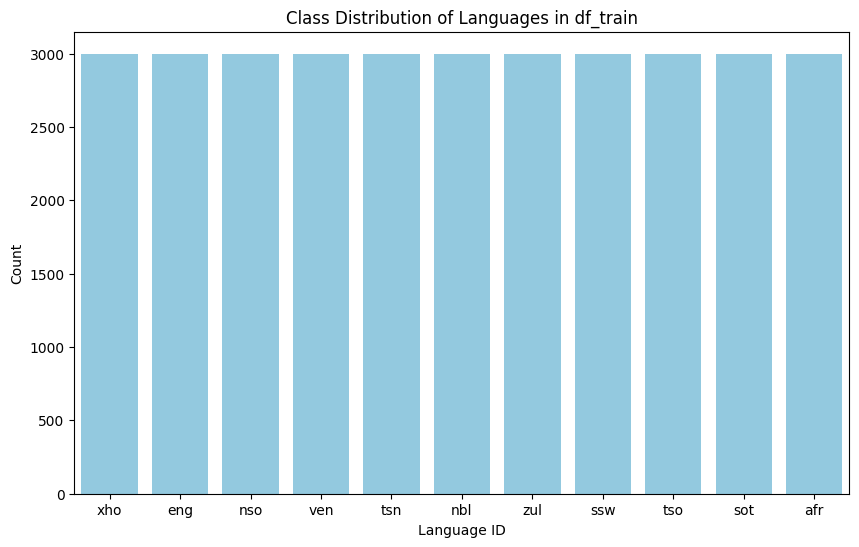

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='lang_id', data=df_train, color='skyblue')
plt.title('Class Distribution of Languages in df_train')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.show()

# 4. Text Pre-Processing





In [13]:
def text_preprocessing(text):
    # Lowercase the text
    text = text.lower()
    # Remove white spaces
    text = text.strip()
    return text

In [14]:
df_train['clean_text'] = df_train['text'].apply(text_preprocessing)
df_test['clean_text'] = df_test['text'].apply(text_preprocessing)

# 5. Feature Engineering


In [35]:
df_train.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [17]:
X = df_train['clean_text']
Y = df_train['lang_id']

## Train Test Split

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , Y, test_size =0.2, random_state=42)

# 6. Model Training

### 7.1 Logistic Regression

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 6),
                             analyzer='char',)


# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=5000, random_state=42, class_weight = None, intercept_scaling= 1)

# Create a pipeline with the vectorizer and the logistic regression model
lg_pipeline = make_pipeline(vectorizer, logistic_regression_model)

# Fit the model on the training data
lg_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = lg_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.9f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.998484848

Classification Report:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))


# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=5000, random_state=42)

# Create a pipeline with the vectorizer and the logistic regression model
lg_pipeline = make_pipeline(vectorizer, logistic_regression_model)

# Fit the model on the training data
lg_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = lg_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.9f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.994848485

Classification Report:
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.98      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.99      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### 7.2 SVM

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score



# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a pipeline with SVM classifier
svm_model = SVC(kernel='linear', C=1.0, probability=True)

# Fit the model on the TF-IDF transformed training data
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.9f}")
print("\nClassification Report:\n", classification_report_output)




Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.98      0.99      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

      index lang_id
0         1     zul
1         2     nbl
2         3     ven
3         4     ssw
4         5     zul
...     ...     ...
5677   

## 7.3 Random forest

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the TF-IDF transformed training data
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test set
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.9f}")
print("\nClassification Report:\n", classification_report_output)




Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.97      0.96      0.96       583
         nso       1.00      1.00      1.00       625
         sot       0.99      1.00      1.00       618
         ssw       0.99      0.98      0.99       584
         tsn       1.00      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.97      0.98       609
         zul       0.93      0.96      0.94       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600

      index lang_id
0         1     tsn
1         2     nbl
2         3     ven
3         4     ssw
4         5     afr
...     ...     ...
5677   

##7.4 Decision Tree

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the TF-IDF transformed training data
dt_model.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test set
y_pred = dt_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_output)

# Make predictions on the TF-IDF transformed test set for submission
X_test_submission_tfidf = tfidf_vectorizer.transform(df_test['clean_text'])
y_test_pred = dt_model.predict(X_test_submission_tfidf)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'index': df_test['index'], 'lang_id': y_test_pred})

# Print the submission DataFrame
print(submission_df)


Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.99      1.00      0.99       615
         nbl       0.88      0.88      0.88       583
         nso       0.99      0.97      0.98       625
         sot       0.96      0.98      0.97       618
         ssw       0.85      0.88      0.87       584
         tsn       0.97      0.97      0.97       598
         tso       0.98      0.99      0.98       561
         ven       1.00      0.99      0.99       634
         xho       0.94      0.88      0.91       609
         zul       0.84      0.85      0.85       590

    accuracy                           0.94      6600
   macro avg       0.94      0.94      0.94      6600
weighted avg       0.95      0.94      0.94      6600

      index lang_id
0         1     ssw
1         2     ssw
2         3     ven
3         4     ssw
4         5     ssw
...     ...     ...
5677   

##7.5 MLP

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score



# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create an MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the model on the TF-IDF transformed training data
mlp_model.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test set
y_pred = mlp_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.9f}")
print("\nClassification Report:\n", classification_report_output)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.998636364

Classification Report:
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



##Model Selection
- The model with the highest accuracy is the MLP Classifier.
- The accuracy was (0.998636364)

# 8. Submissions

In [21]:
X_test_df = df_test['clean_text']

# TF-IDF vectorization for the test set
X_test_submission_tfidf = tfidf_vectorizer.transform(X_test_df)

# Make predictions on the TF-IDF transformed test set for submission
y_test_pred = mlp_model.predict(X_test_submission_tfidf)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'index': df_test['index'], 'lang_id': y_test_pred})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_mlp.csv', index=False)

# Print the submission DataFrame
print(submission_df)


      index lang_id
0         1     tsn
1         2     nbl
2         3     ven
3         4     ssw
4         5     afr
...     ...     ...
5677   5678     eng
5678   5679     nso
5679   5680     sot
5680   5681     sot
5681   5682     xho

[5682 rows x 2 columns]
